# Animate Robot Motion

本ページではロボットとフィールドを用意し、ロボットの動きをアニメーションにできることを確認します。

注がある場合を除き、本ページに掲載されているコードはMITライセンスに、文章はクリエイティブ・コモンズ・ライセンスに基づいて公開します。

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

## References

http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

https://matplotlib.org/examples/pylab_examples/subplots_demo.html

http://villageofsound.hatenadiary.jp/entry/2014/10/28/005505

In [1]:
# 数値計算及び描画に必要なモジュール
import numpy as np
import math
from  matplotlib import pyplot as plt

# アニメーション作成・表示に必要なモジュール
from matplotlib import animation
from IPython.display import HTML

# Step1
まずはランドマークをプロットできるようにします。

In [2]:
class Landmarks:
    """
    landmarks = Landmarks([[x1, y1], [x2, y2], ... , [x, y]])
    引数にランドマークのX座標とY座標を配列で指定
    """
    def __init__(self, array):
        """
        ランドマークの座標を配列で取得
        あとで計算処理しやすくするため、numpyのarrayに変換
        """
        self.positions = np.array(array)
    
    def draw(self):
        """
        取得したすべてのランドマークの座標をプロット
        """
        xs = [ e[0] for e in self.positions]
        ys = [ e[1] for e in self.positions]
        plt.scatter(xs, ys, s=300, marker="*", label="landmarks", color="orange")
        #return subplot.plot(xs, ys, '.', markersize=20, marker="*", label="landmarks", color="orange")

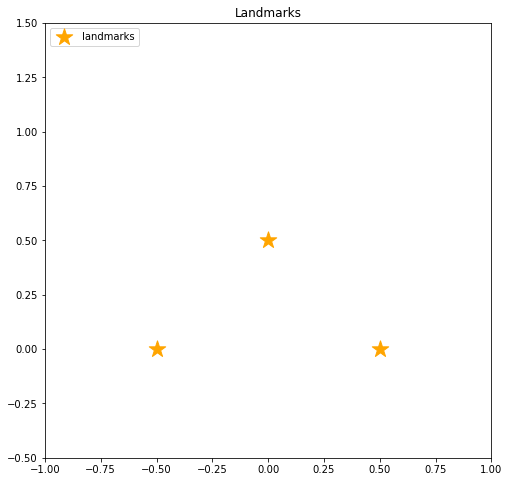

In [3]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("Landmarks")
world = fig.add_subplot(1,1,1)
world.set_xlim(-1.0,1.0)
world.set_ylim(-0.5,1.5)

# ランドマークの座標を指定
landmarks = Landmarks([[-0.5, 0.0], [0.5, 0.0], [0.0, 0.5]])
# ランドマークを描画
landmarks.draw()

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()

プロットした結果は`plt.show()`で確認できます。確認するたびに`fig = plt.figure()`で__新たにfigureを用意する必要があります。__

# Step2

次に、ロボットをプロットします。ランドマークとロボットが両方表示されることを確認します。

In [4]:
class Robot:
    """
    ロボットの動作を決めるためのクラス
    ロボットは現在の自身の座標を把握できません。
    そのため、描画のための座標は別のクラスで管理します。
    """
    def __init__(self, x, y, rad):
        self.motion = RobotMotion(x, y, rad)
    
    def move(self, distance, direction):
        self.motion.updatePos(distance, direction)
        
    def draw(self, subplot):
        self.motion.draw(subplot)
        

class RobotMotion:
    """
    ロボットの描画のためのクラス
    ロボットの動作を決めるのはこのクラスではありません。
    """
    def __init__(self, x, y, theta):
        """
        ロボットの座標、角度を配列で取得
        あとで計算処理しやすくするため、numpyのarrayに変換
        """
        self.actual_poses = [np.array([x, y, theta])]
    
    def draw(self, subplot):
        """
        ロボットの座標、角度情報を元にベクトルを描画
        """
        xs = [e[0] for e in self.actual_poses]
        ys = [e[1] for e in self.actual_poses]
        vxs = [math.cos(e[2]) for e in self.actual_poses]
        vys = [math.sin(e[2]) for e in self.actual_poses]
        subplot.quiver(xs,ys,vxs,vys,color="red",label="ideal robot motion")
        
    def updatePos(self, distance, direction):
        """
        ロボットを移動
        進む距離、進む角度を元に位置情報を更新
        """
        px, py, pth = self.actual_poses[-1]
        x = px + distance * math.cos(pth)
        y = py + distance * math.sin(pth)
        th = pth + direction
        self.actual_poses.append(np.array([x, y, th]))

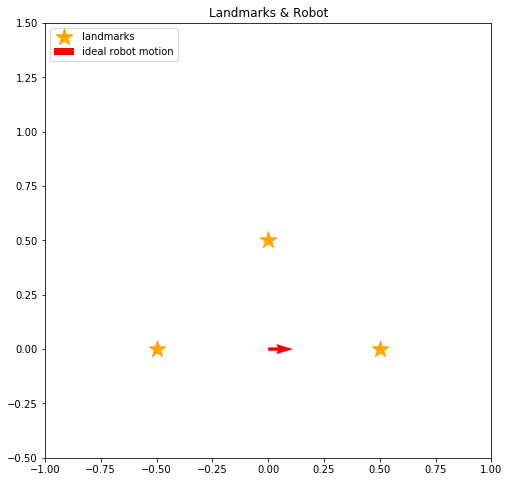

In [5]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("Landmarks & Robot")
world = fig.add_subplot(1,1,1)
world.set_xlim(-1.0,1.0)
world.set_ylim(-0.5,1.5)

# ランドマークを描画
# ランドマークの座標は指定済みなので再指定しない
landmarks.draw()

# ロボットの座標を指定
robot = Robot(0,0,0)
# ロボットを描画
robot.draw(world)

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()

# Step3
次に、試しにロボットを動かしてみます。

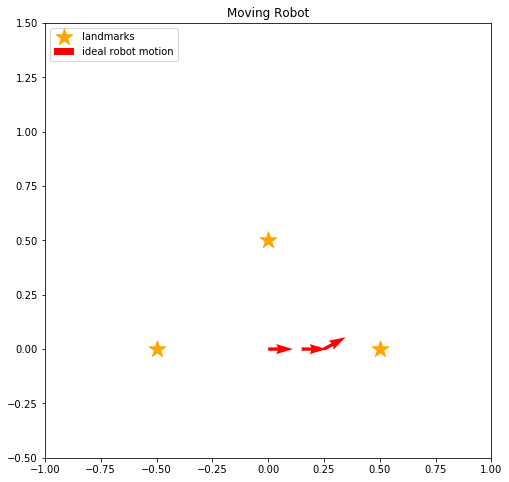

In [6]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("Moving Robot")
world = fig.add_subplot(1,1,1)
world.set_xlim(-1.0,1.0)
world.set_ylim(-0.5,1.5)

# ランドマークを描画
# ランドマークの座標は指定済みなので再指定しない
landmarks.draw()

# ロボットを移動
# ロボットの初期姿勢は指定済みなので再指定しない
robot.move(0.15, 0)
robot.move(0.1, 0.5)
# ロボットを描画
robot.draw(world)

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()

# Step4

最後にロボットが動く様子をアニメーションにしてみます。

In [7]:
# 新規ウィンドウと座標軸用subplotを用意
# タイトルは個別につけるので今は指定しない
fig, world = plt.subplots(figsize=(8, 8))

# ランドマークの座標を指定
landmarks = Landmarks([[-0.5, 0.0], [0.5, 0.0], [0.0, 0.5]])

# ロボットの座標を指定
robot = Robot(0,0,0)

# アニメーション作成の初期処理
# 初期処理を指定しないと、更新処理が1回分多く呼び出される
def init():
    pass

# アニメーション作成の更新処理
def update(i):
    # 座標軸用subplotの描画内容を一度クリア
    plt.cla()
    # 座標軸の範囲を指定
    world.set_xlim(-1.0,1.0)
    world.set_ylim(-0.5,1.5)
    # ランドマークを描画
    landmarks.draw()
    # ロボットを移動
    robot.move(0.1, 0.3)
    # ロボットを描画
    robot.draw(world)
    # タイトルを追加
    plt.title("Robot Motion : frame{0:04d}".format(i))
    # 左上に凡例を追加
    world.legend(loc='upper left')

# アニメーションの作成
anim = animation.FuncAnimation(fig, update, init_func=init, interval=500, frames=10)

以上でアニメーションを作成できました。

`FuncAnimation`のオプションで`init_func`をしていしないと、0番目の処理が2回行われます。
今回のアニメーションではフレーム番号が0,0,1,2,3,...となってしまいます。
そこで、init()で何もしない処理を指定しています。

init()とupdate()の処理を以下のように書き換えると、1フレームずつ保存するよう書き換えることができます。

```python
# アニメーション作成の初期処理
# 初期処理を指定しないと、更新処理が1回分多く呼び出される
from os import makedirs
def init():
    # 画像保存用ディレクトリの作成
    makedirs("images", exist_ok=True)
    
# アニメーション作成の更新処理
def update(i):
    # 座標軸用subplotの描画内容を一度クリア
    plt.cla()
    # 座標軸の範囲を指定
    world.set_xlim(-1.0,1.0)
    world.set_ylim(-0.5,1.5)
    # ランドマークを描画
    landmarks.draw()
    # ロボットを移動
    robot.move(0.1, 0.3)
    # ロボットを描画
    robot.draw(world)
    # タイトルを追加
    plt.title("Robot Motion : frame{0:04d}".format(i))
    # 左上に凡例を追加
    world.legend(loc='upper left')
    # 保存
    plt.savefig("images/fig{0}.png".format(i))
```

最後に作成したアニメーションの確認をします。

In [8]:
HTML(anim.to_html5_video())

以下のようなエラーが出た場合は`ffmpeg`をインストールすることで問題を解決できます。  
`"RuntimeError: No MovieWriters available!"`

ここではアニメーションを描画するだけにしましたが、以下のように書き換えるとGIFアニメーションとして保存できます。  
拡張子を変えればMP4などでも保存できます。

```python
from matplotlib import rc
rc('animation', html='html5')
# 作成したアニメーションの確認
anim
# アニメーションを保存
anim.save("animation.gif", writer='imagemagick')
```

なお、2017年6月1日現在、このアニメーションはGitHub上ではプレビューはできないようです。
Jupyter Notebookの環境を用意した上で実行してみてください。

今回は以下のようにしてアニメーションの画像を1枚ずつすべて表示してみます。

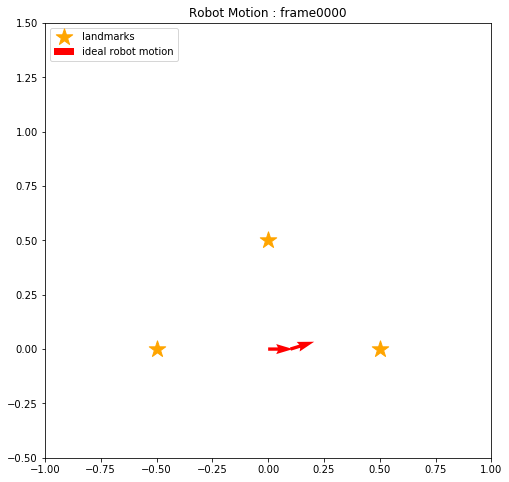

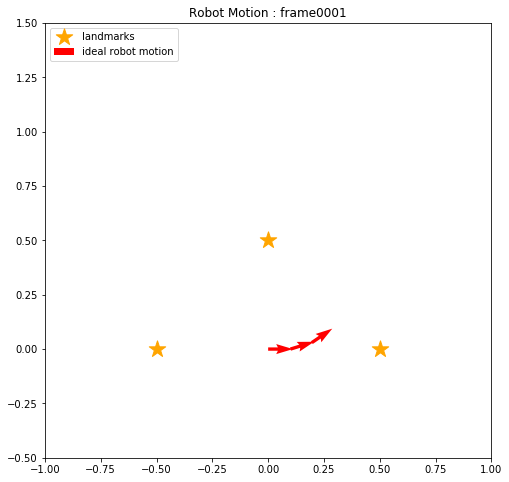

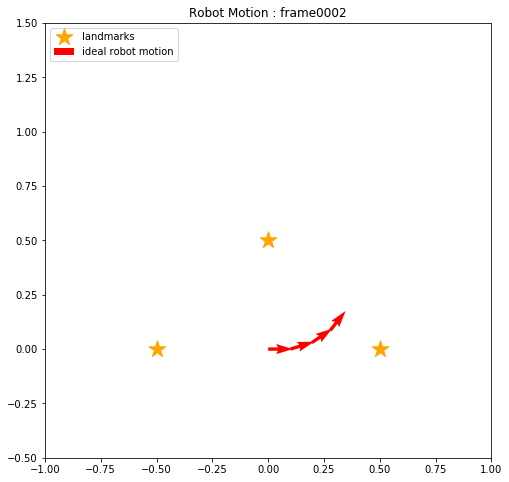

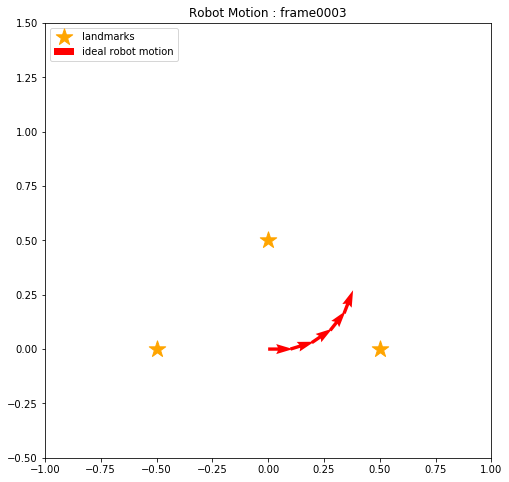

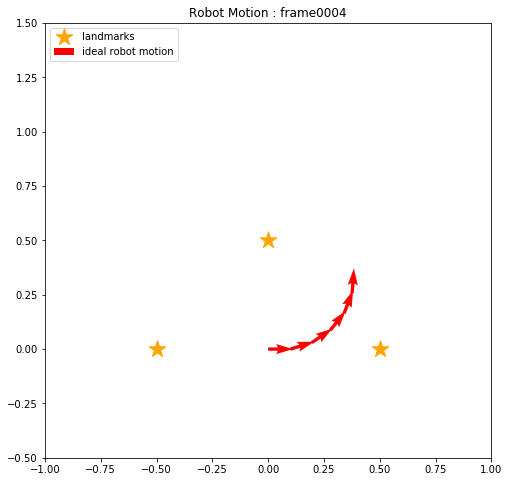

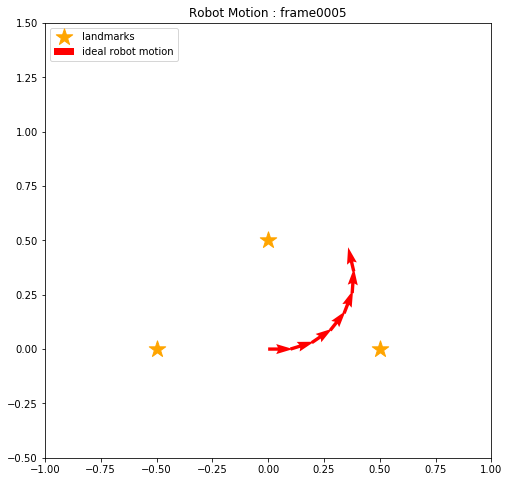

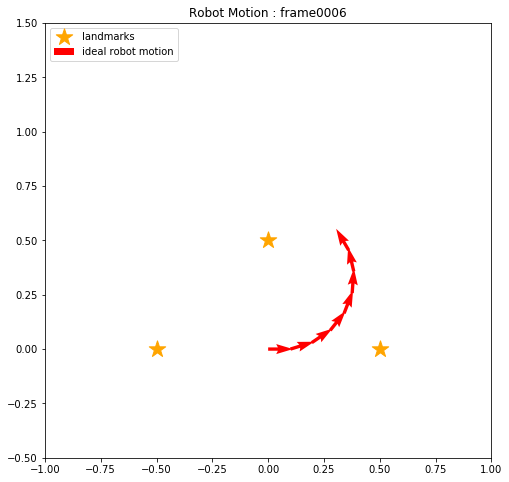

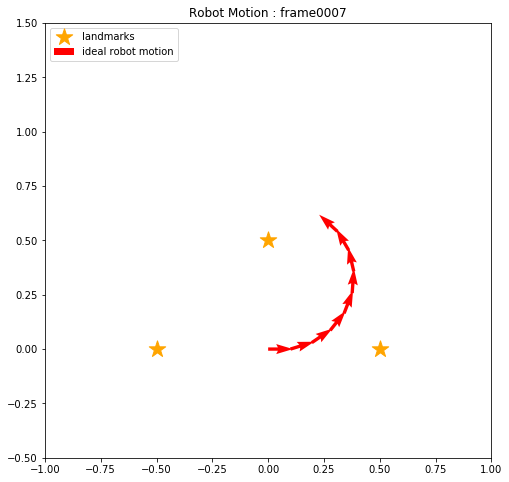

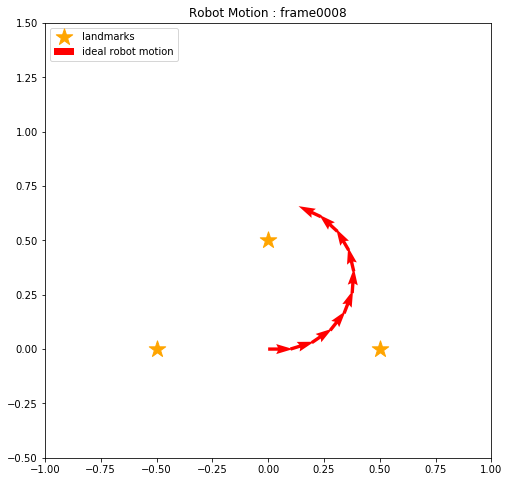

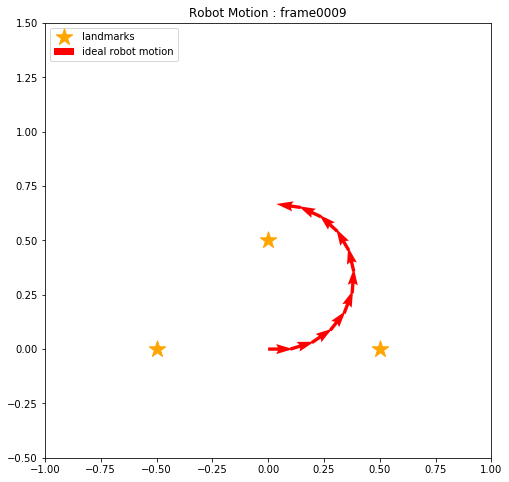

In [9]:
# figureの初期化
plt.close()

# ランドマークの座標を指定
landmarks = Landmarks([[-0.5, 0.0], [0.5, 0.0], [0.0, 0.5]])

# ロボットの座標を指定
robot = Robot(0,0,0)

# アニメーション作成の更新処理
def update(i):
    # 新規ウィンドウと座標軸を用意
    # タイトルは個別につけるので今は指定しない
    fig, world = plt.subplots(figsize=(8, 8))
    # 座標軸の範囲を指定
    world.set_xlim(-1.0,1.0)
    world.set_ylim(-0.5,1.5)
    # ランドマークを描画
    landmarks.draw()
    # ロボットを移動
    robot.move(0.1, 0.3)
    # ロボットを描画
    robot.draw(world)
    # タイトルを追加
    plt.title("Robot Motion : frame{0:04d}".format(i))
    # 左上に凡例を追加
    world.legend(loc='upper left')

# アニメーションの作成
for i in range(0,10):
    update(i)
    plt.show()